<a href="https://colab.research.google.com/github/ricacero/Datascience300/blob/main/proyectofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import ast
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import QuantileTransformer
import seaborn as sb
from sklearn.metrics import pairwise_distances_argmin_min

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [5]:
%cd '/content/gdrive/MyDrive/PYFINAL'

/content/gdrive/MyDrive/PYFINAL


In [6]:
movies = pd.read_csv('movies_metadata.csv', encoding='iso8859')
movie = pd.read_csv('movies_metadata.csv', encoding='iso8859')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
movie.shape

(45466, 24)

In [8]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['id'] for i in x] if isinstance(x, list) else [])
 # Sacamos el id de generos 

In [9]:
#Se agrega en el df movie el id del genero de cada pelicula.
gp=movie['genres'].values
y = []
for i in range(len(gp)):
  if len(gp[i]) > 0:
    y.append(gp[i][0])
  else:
    y.append(0)

movie.loc[:,'genid'] = y



In [10]:
#Se obtiene el nombre de cada genero del df
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#Se agrega en el df movie el nombre del genero de cada pelicula.
gp1=movies['genres'].values
y1 = []
for i in range(len(gp1)):
  if len(gp1[i]) > 0:
    y1.append(gp1[i][0])
  else:
    y1.append('NA')

movie.loc[:,'genero'] = y1

In [11]:
#Se obtiene el nombre de cada compañia de produccion del df movies
movies = pd.read_csv('movies_metadata.csv', encoding='iso8859')
movies['production_companies'] = movies['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['id'] for i in x] if isinstance(x, list) else [])
cp=movies['production_companies'].values
z = []
for i in range(len(cp)):
  if len(cp[i]) > 0:
    z.append(cp[i][0])
  else:
    z.append('0')

movie.loc[:,'compid'] = z

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
movies = pd.read_csv('movies_metadata.csv', encoding='iso8859')

movies['production_companies'] = movies['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
cp1=movies['production_companies'].values
z1 = []
for i in range(len(cp1)):
  if len(cp1[i]) > 0:
    z1.append(cp1[i][0])
  else:
    z1.append('0')

movie.loc[:,'compname'] = z1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
#Se borra del df movie todas las columnas que no son numericas y que creemos que no nos sirven
movie = movie.drop('status', axis=1)
movie = movie.drop('belongs_to_collection', axis=1)
movie = movie.drop('adult', axis=1)
movie = movie.drop('genres', axis=1)
movie = movie.drop('homepage', axis=1)
movie = movie.drop('imdb_id', axis=1)
movie = movie.drop('original_language', axis=1)
movie = movie.drop('overview', axis=1)
movie = movie.drop('poster_path', axis=1)
movie = movie.drop('production_companies', axis=1)
movie = movie.drop('production_countries', axis=1)
movie = movie.drop('release_date', axis=1)
movie = movie.drop('revenue', axis=1)
movie = movie.drop('runtime', axis=1)
movie = movie.drop('spoken_languages', axis=1)
movie = movie.drop('tagline', axis=1)
movie = movie.drop('video', axis=1)

In [14]:
movie = movie.dropna() #borramos los nulos

In [15]:
movie.head()

,budget,id,original_title,popularity,title,vote_average,vote_count,genid,genero,compid,compname
0,30000000,862,Toy Story,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios
1,65000000,8844,Jumanji,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures
2,0,15602,Grumpier Old Men,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.
3,16000000,31357,Waiting to Exhale,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation
4,0,11862,Father of the Bride Part II,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions


In [16]:
#Se revisa que diferencia se encuentra en la columna de titulo de la pelicula original con la del titulo, y revisar si podemos eliminar alguna columna que no nos sirva
movie[movie['original_title'] != movie['title']][['title', 'original_title']].head()



,title,original_title
28,The City of Lost Children,La CitÃ© des Enfants Perdus
29,Shanghai Triad,æåæï¼æå°å¤å©æ¡¥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [17]:
#Se decide borrar la columna original_title
movie = movie.drop('original_title', axis=1)

In [ ]:
movie.head()

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname
0,30000000,862,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios
1,65000000,8844,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures
2,0,15602,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation
4,0,11862,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions


In [18]:
#Copiamos el df Movie en movie1
movie1=movie

In [19]:
#Se carga credits para poder sacar los actores y directores
credits = pd.read_csv('credits.csv', encoding='iso8859')

In [20]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [21]:
#Funcion para convertir en entero
def convertint(x):
    try:
        return int(x)
    except:
        return np.nan

In [22]:
movie['id'] = movie['id'].apply(convertint)


In [23]:
#Se hace un join de movie con credits por el id de la pelicula
movie = movie.merge(credits, on='id')
movie.shape

(45535, 12)

In [24]:
movie['cast'] = movie['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['id'] for i in x] if isinstance(x, list) else [])
movie.head(5)


,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,cast,crew
0,30000000,862,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000,8844,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0,15602,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0,11862,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [25]:

#Se agrega en el df movie el id del actor principal de cada pelicula.
act=movie['cast'].values
m = []
for i in range(len(act)):
  if len(act[i]) > 0:
    m.append(act[i][0])
  else:
    m.append('0')

movie.loc[:,'actid'] = m
movie.head(5)



,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,cast,crew,actid
0,30000000,862,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",31
1,65000000,8844,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2157
2,0,15602,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",6837
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[{'credit_id': '52fe44779251416c91011acb', 'de...",8851
4,0,11862,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",67773


In [26]:
moviedef=movie

In [27]:
movie1 = movie1.merge(credits, on='id')
movie1.shape

(45535, 12)

In [28]:

movie1['cast'] = movie1['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#Se agrega en el df moviedef el nombre del actor principal de cada pelicula.
actname=movie1['cast'].values
g = []
for i in range(len(actname)):
  if len(actname[i]) > 0:
    g.append(actname[i][0])
  else:
    g.append('NA')

moviedef.loc[:,'actname'] = g
moviedef.head(5)

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,cast,crew,actid,actname
0,30000000,862,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios,"[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",31,Tom Hanks
1,65000000,8844,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures,"[2157, 8537, 205, 145151, 5149, 10739, 58563, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2157,Robin Williams
2,0,15602,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.,"[6837, 3151, 13567, 16757, 589, 16523, 7166]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",6837,Walter Matthau
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation,"[8851, 9780, 18284, 51359, 66804, 352, 87118, ...","[{'credit_id': '52fe44779251416c91011acb', 'de...",8851,Whitney Houston
4,0,11862,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions,"[67773, 3092, 519, 70696, 59222, 18793, 14592,...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",67773,Steve Martin


In [29]:
moviedef['id'] = moviedef['id'].apply(convertint)

In [30]:
moviedef = moviedef.drop('cast', axis=1)#Borramos la columna cast ya que no la necesitamos

In [31]:
movie['crew'] = movie['crew'].apply(ast.literal_eval)


In [32]:
def get_director(x):#funcion para obtener el id del director de la columna crew y los que no tengan los ponga en null
    for i in x:
        if i['job'] == 'Director':
            return i['id']
    return np.nan

In [33]:
moviedef['directid'] = movie['crew'].apply(get_director)

In [34]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [35]:
moviedef['director'] = movie['crew'].apply(get_director)

In [36]:
moviedef.head()

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,crew,actid,actname,directid,director
0,30000000,862,21.946943,Toy Story,7.7,5415.0,16,Animation,3,Pixar Animation Studios,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",31,Tom Hanks,7879.0,John Lasseter
1,65000000,8844,17.015539,Jumanji,6.9,2413.0,12,Adventure,559,TriStar Pictures,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",2157,Robin Williams,4945.0,Joe Johnston
2,0,15602,11.7129,Grumpier Old Men,6.5,92.0,10749,Romance,6194,Warner Bros.,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",6837,Walter Matthau,26502.0,Howard Deutch
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34.0,35,Comedy,306,Twentieth Century Fox Film Corporation,"[{'credit_id': '52fe44779251416c91011acb', 'de...",8851,Whitney Houston,2178.0,Forest Whitaker
4,0,11862,8.387519,Father of the Bride Part II,5.7,173.0,35,Comedy,5842,Sandollar Productions,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",67773,Steve Martin,56106.0,Charles Shyer


In [37]:
moviedef = moviedef.drop('crew', axis=1)#Borramos la columna crew ya que obtuvimos el director

In [38]:
def convertint(x):#Funcion para convertir en entero
    try:
        return int(x)
    except:
        return np.nan
moviedef['directid'] = moviedef['directid'].apply(convertint)
moviedef['vote_count'] = moviedef['vote_count'].apply(convertint)

In [39]:
#Crear un vector con los pesos de las caracteristicas el numero de votos contra el voto promedio

vote_counts = moviedef[moviedef['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = moviedef[moviedef['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244844625013726

In [40]:
f=vote_counts.quantile(0.80)
f

50.0

In [41]:
wvote=moviedef['vote_average'].values
wvote1=moviedef['vote_count'].values
h = []
for i in range(len(wvote)):
  if vote_counts[i] >= vote_counts.quantile(0.9754):
    v = wvote1[i]
    R = wvote[i]
    m=vote_counts.quantile(0.98)
    wr=(v/(v+m) * R) + (m/(m+v) * C)
    h.append(wr)
  elif vote_counts[i] >= vote_counts.quantile(0.95) and vote_counts[i] < vote_counts.quantile(0.9754):
    v = wvote1[i]
    R = wvote[i]
    m=vote_counts.quantile(0.95)
    wr=(v/(v+m) * R) + (m/(m+v) * C)
    wr=wr*0.95
    h.append(wr)
  elif vote_counts[i] >= vote_counts.quantile(0.85) and vote_counts[i] < vote_counts.quantile(0.95)   :
    v = wvote1[i]
    R = wvote[i]
    m=vote_counts.quantile(0.85)
    wr=(v/(v+m) * R) + (m/(m+v) * C)
    wr=wr*0.85
    h.append(wr)
  elif vote_counts[i] >= vote_counts.quantile(0.80) and vote_counts[i] < vote_counts.quantile(0.85)   :
    v = wvote1[i]
    R = wvote[i]
    m=vote_counts.quantile(0.80)
    wr=(v/(v+m) * R) + (m/(m+v) * C)
    wr=wr*0.70
    h.append(wr)
  elif vote_counts[i] < vote_counts.quantile(0.80) :
    h.append(0)

In [42]:
moviedef.loc[:,'vote'] = h
moviedef.head(5)

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote
0,30000000,862,21.946943,Toy Story,7.7,5415,16,Animation,3,Pixar Animation Studios,31,Tom Hanks,7879.0,John Lasseter,7.243742
1,65000000,8844,17.015539,Jumanji,6.9,2413,12,Adventure,559,TriStar Pictures,2157,Robin Williams,4945.0,Joe Johnston,6.339361
2,0,15602,11.7129,Grumpier Old Men,6.5,92,10749,Romance,6194,Warner Bros.,6837,Walter Matthau,26502.0,Howard Deutch,5.022216
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34,35,Comedy,306,Twentieth Century Fox Film Corporation,8851,Whitney Houston,2178.0,Forest Whitaker,0.000000
4,0,11862,8.387519,Father of the Bride Part II,5.7,173,35,Comedy,5842,Sandollar Productions,67773,Steve Martin,56106.0,Charles Shyer,4.720591


In [43]:
#creamos un vector con el valor de 0 si la pelicula tiene un promedio de votos mayor de 6 y sino un valor de 1
promvote=moviedef['vote'].values
r = []
for i in range(len(promvote)):
  if promvote[i] >= 6:
    r.append(0)
  else:
    r.append(1)

In [44]:
moviedef.loc[:,'target'] = r
moviedef.head(5)

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote,target
0,30000000,862,21.946943,Toy Story,7.7,5415,16,Animation,3,Pixar Animation Studios,31,Tom Hanks,7879.0,John Lasseter,7.243742,0
1,65000000,8844,17.015539,Jumanji,6.9,2413,12,Adventure,559,TriStar Pictures,2157,Robin Williams,4945.0,Joe Johnston,6.339361,0
2,0,15602,11.7129,Grumpier Old Men,6.5,92,10749,Romance,6194,Warner Bros.,6837,Walter Matthau,26502.0,Howard Deutch,5.022216,1
3,16000000,31357,3.859495,Waiting to Exhale,6.1,34,35,Comedy,306,Twentieth Century Fox Film Corporation,8851,Whitney Houston,2178.0,Forest Whitaker,0.000000,1
4,0,11862,8.387519,Father of the Bride Part II,5.7,173,35,Comedy,5842,Sandollar Productions,67773,Steve Martin,56106.0,Charles Shyer,4.720591,1


In [45]:
mdef=moviedef

In [46]:
calificadas = mdef.sort_values('vote', ascending=False).head(20000)

In [47]:
calificadas.head(5)

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote,target
314,25000000,278,51.645403,The Shawshank Redemption,8.5,8358,18,Drama,97,Castle Rock Entertainment,504,Tim Robbins,4027.0,Frank Darabont,8.080637,0
12525,185000000,155,123.167259,The Dark Knight,8.3,12269,18,Drama,429,DC Comics,3894,Christian Bale,525.0,Christopher Nolan,8.020387,0
2854,63000000,550,63.869599,Fight Club,8.3,9678,18,Drama,306,Twentieth Century Fox Film Corporation,819,Edward Norton,7467.0,David Fincher,7.954007,0
837,6000000,238,41.109264,The Godfather,8.5,6024,18,Drama,4,Paramount Pictures,3084,Marlon Brando,1776.0,Francis Ford Coppola,7.945817,0
292,8000000,680,140.950236,Pulp Fiction,8.3,8670,53,Thriller,14,Miramax Films,8891,John Travolta,138.0,Quentin Tarantino,7.918800,0


In [48]:
mdef = mdef.drop('title', axis=1)
#mdef = mdef.drop('vote_count', axis=1)
mdef = mdef.drop('genero', axis=1)
mdef = mdef.drop('compname', axis=1)
mdef = mdef.drop('actname', axis=1)
mdef = mdef.drop('director', axis=1)
mdef = mdef.drop('vote', axis=1)

In [49]:
mdef.head()

,budget,id,popularity,vote_average,vote_count,genid,compid,actid,directid,target
0,30000000,862,21.946943,7.7,5415,16,3,31,7879.0,0
1,65000000,8844,17.015539,6.9,2413,12,559,2157,4945.0,0
2,0,15602,11.7129,6.5,92,10749,6194,6837,26502.0,1
3,16000000,31357,3.859495,6.1,34,35,306,8851,2178.0,1
4,0,11862,8.387519,5.7,173,35,5842,67773,56106.0,1


In [50]:
calificadas.describe()

,id,vote_average,vote_count,genid,directid,vote,target
count,20000.000000,20000.000000,20000.000000,20000.000000,1.967300e+04,20000.000000,20000.000000
mean,121997.956000,5.738140,235.181500,879.513100,2.851782e+05,2.303800,0.943700
std,125559.207909,1.840874,721.460945,2839.036252,4.564666e+05,2.566532,0.230506
min,5.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,15763.500000,5.200000,4.000000,18.000000,1.945000e+04,0.000000,1.000000
50%,68636.500000,6.100000,25.000000,28.000000,7.005500e+04,0.000000,1.000000
75%,212843.250000,6.900000,138.000000,35.000000,2.111380e+05,4.915241,1.000000
max,468707.000000,10.000000,14075.000000,10770.000000,1.907940e+06,8.080637,1.000000


In [51]:
calificadas['budget'].describe()

count     20000
unique      831
top           0
freq      13812
Name: budget, dtype: object

In [52]:
calificadas['budget'] = pd.to_numeric(calificadas['budget'], errors='coerce')

In [53]:
calificadas['budget'] = calificadas['budget'].replace(np.nan, 0)

In [54]:
calificadas['budget'].describe()

count    2.000000e+04
mean     8.822458e+06
std      2.523577e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.700000e+06
max      3.800000e+08
Name: budget, dtype: float64

In [55]:
calificadas['popularity'].describe()

count     20000
unique    19729
top         0.0
freq         15
Name: popularity, dtype: object

In [56]:
calificadas['popularity'] = pd.to_numeric(calificadas['popularity'], errors='coerce')

In [58]:
calificadas['popularity'] = calificadas['popularity'].replace(np.nan, 0)

In [59]:
calificadas['popularity'].describe()

count    19673.000000
mean         4.793735
std          8.487779
min          0.000000
25%          0.556400
50%          2.645913
75%          7.417324
max        547.488298
Name: popularity, dtype: float64

In [60]:
calificadas = calificadas.dropna()

In [61]:
#calificadas['count'] = 1
calificadas.groupby(['budget']).count()#['count']

,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote,target
budget,,,,,,,,,,,,,,,
0,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498,13498
1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260000000,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
270000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
280000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [63]:
calificadas.groupby(['popularity']).count()#['count']

,budget,id,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote,target
popularity,,,,,,,,,,,,,,,
0.000000,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
0.000001,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
0.000002,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
0.000003,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
0.000008,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213.849907,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
228.032744,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
287.253654,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [62]:
correlations = calificadas.corr()
print(correlations)

                budget        id  popularity  vote_average  vote_count  \
budget        1.000000 -0.167642    0.424021      0.096992    0.665598   
id           -0.167642  1.000000   -0.110522     -0.143433   -0.117710   
popularity    0.424021 -0.110522    1.000000      0.185790    0.546772   
vote_average  0.096992 -0.143433    0.185790      1.000000    0.174728   
vote_count    0.665598 -0.117710    0.546772      0.174728    1.000000   
genid        -0.032359  0.066779   -0.019370     -0.012424   -0.030312   
directid     -0.177131  0.493812   -0.172736     -0.118045   -0.147688   
vote          0.426584 -0.332378    0.519828      0.351080    0.456271   
target       -0.337443  0.105867   -0.359054     -0.219028   -0.626294   

                 genid  directid      vote    target  
budget       -0.032359 -0.177131  0.426584 -0.337443  
id            0.066779  0.493812 -0.332378  0.105867  
popularity   -0.019370 -0.172736  0.519828 -0.359054  
vote_average -0.012424 -0.118045  0.351

In [64]:
c1=calificadas

In [65]:
c1 = c1.drop('title', axis=1)
#mdef = mdef.drop('vote_count', axis=1)
c1 = c1.drop('genero', axis=1)
c1 = c1.drop('compname', axis=1)
c1 = c1.drop('actname', axis=1)
c1 = c1.drop('director', axis=1)
#c1 = c1.drop('count', axis=1)

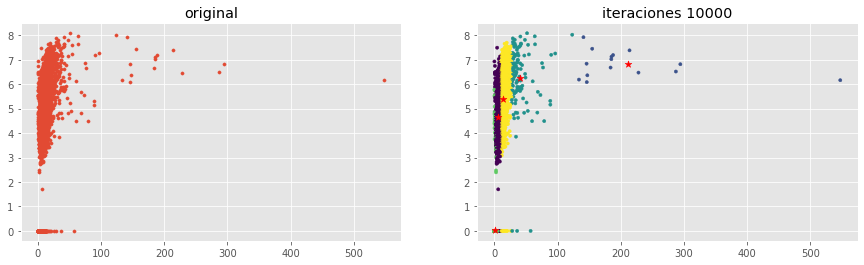

In [66]:
X= c1[['popularity', 'vote']].values

fig,axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X[:,0],X[:,1],s=10)
axs[0].set_title('original')
for max_iter,fig in zip([10000],[1]):
  kmeans_clustering = KMeans(n_clusters=5, max_iter= max_iter, init='random')
  clusters = kmeans_clustering.fit_predict(X)
  #print(clusters)
  axs[fig].set_title('iteraciones '+str(max_iter))
  axs[fig].scatter(X[:,0],X[:,1],c=clusters,s=10)
  clusters_center=kmeans_clustering.cluster_centers_
  axs[fig].scatter(clusters_center[:,0],clusters_center[:,1], marker='*',c='r',s=50)
  

In [67]:
c1["Clus_km"] = clusters
calificadas["Clus_km"] = clusters

In [68]:
c1.head(25)

,budget,id,popularity,vote_average,vote_count,genid,compid,actid,directid,vote,target,Clus_km
314,25000000,278,51.645403,8.5,8358,18,97,504,4027.0,8.080637,0,2
12525,185000000,155,123.167259,8.3,12269,18,429,3894,525.0,8.020387,0,2
2854,63000000,550,63.869599,8.3,9678,18,306,819,7467.0,7.954007,0,2
837,6000000,238,41.109264,8.5,6024,18,4,3084,1776.0,7.945817,0,2
292,8000000,680,140.950236,8.3,8670,53,14,8891,138.0,7.918800,0,1
15545,160000000,27205,29.108149,8.1,14075,28,923,6193,525.0,7.869514,0,2
22949,165000000,157336,32.213481,8.1,11187,12,4,10297,525.0,7.815932,0,2
351,55000000,13,48.307194,8.2,8147,35,4,31,24.0,7.810724,0,2
7029,94000000,122,29.324358,8.1,8226,12,11,109,108.0,7.727037,0,2
1163,18000000,1891,19.470959,8.2,5998,12,1,2,10930.0,7.695083,0,4


In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
x=c1[['popularity', 'vote']].values
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

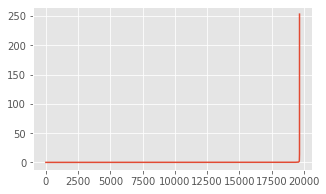

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

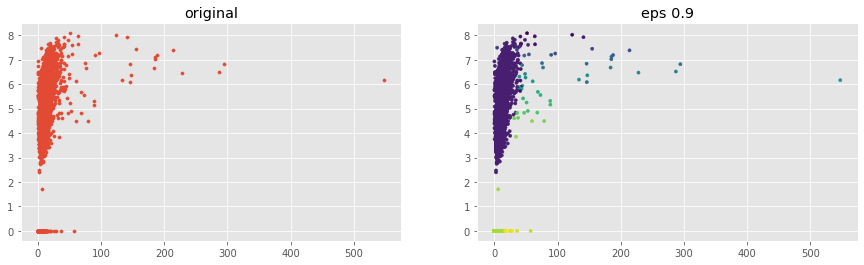

In [69]:
X= c1[['popularity', 'vote']].values
fig,axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X[:,0],X[:,1],s=10)
axs[0].set_title('original')
for fig, eps, ms in zip([1], [0.9], [0.01]):
   dbs = DBSCAN(eps =eps, min_samples = ms)
   clustersdb = dbs.fit_predict(X)
  #print(clusters)
   #print(clusters)
   axs[fig].set_title('eps '+str(eps))
   axs[fig].scatter(X[:,0],X[:,1],c=clustersdb,s=10)

In [70]:
c1["Clus_db"] = clustersdb
calificadas["Clus_db"] = clustersdb

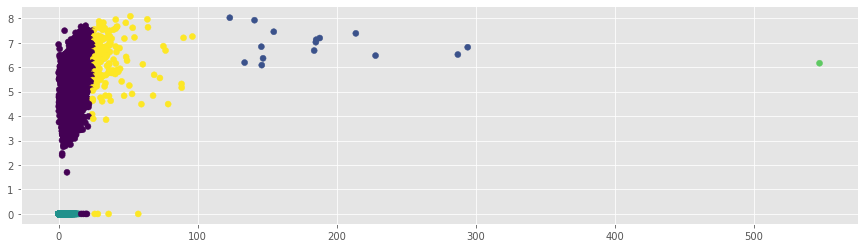

In [75]:

from sklearn.cluster import AgglomerativeClustering
fig,axs = plt.subplots(figsize=(15,4))

X= c1[['popularity', 'vote']].values

agl_c = AgglomerativeClustering(n_clusters= 5)
clustersag = agl_c.fit_predict(X)
axs.scatter(X[:,0],X[:,1], c = clustersag)

In [76]:
c1["Clus_ag"] = clustersag
calificadas["Clus_ag"] = clustersag

In [77]:
calificadas.head()

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,actid,actname,directid,director,vote,target,Clus_km,Clus_db,Clus_ag
314,25000000,278,51.645403,The Shawshank Redemption,8.5,8358,18,Drama,97,Castle Rock Entertainment,504,Tim Robbins,4027.0,Frank Darabont,8.080637,0,2,0,4
12525,185000000,155,123.167259,The Dark Knight,8.3,12269,18,Drama,429,DC Comics,3894,Christian Bale,525.0,Christopher Nolan,8.020387,0,2,1,1
2854,63000000,550,63.869599,Fight Club,8.3,9678,18,Drama,306,Twentieth Century Fox Film Corporation,819,Edward Norton,7467.0,David Fincher,7.954007,0,2,2,4
837,6000000,238,41.109264,The Godfather,8.5,6024,18,Drama,4,Paramount Pictures,3084,Marlon Brando,1776.0,Francis Ford Coppola,7.945817,0,2,3,4
292,8000000,680,140.950236,Pulp Fiction,8.3,8670,53,Thriller,14,Miramax Films,8891,John Travolta,138.0,Quentin Tarantino,7.918800,0,1,4,1


In [78]:

clusag = c1['Clus_ag'].value_counts().reset_index()
clusag.columns = ['Clus_ag', 'numero']
clusag.head(11)

,Clus_ag,numero
0,2,10506
1,0,9000
2,4,151
3,1,15
4,3,1


In [79]:
cluskm = c1['Clus_km'].value_counts().reset_index()
cluskm.columns = ['Clus_km', 'numero']
cluskm.head(11)

,Clus_km,numero
0,3,10335
1,0,6264
2,4,2942
3,2,117
4,1,15


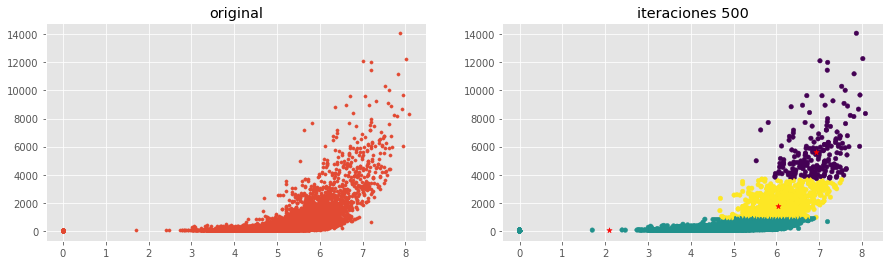

In [80]:
X1= c1[['vote', 'vote_count']].values

fig,axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X1[:,0],X1[:,1],s=10)
axs[0].set_title('original')
for max_iter,fig in zip([500],[1]):
  kmeans_clustering1 = KMeans(n_clusters=3, max_iter= max_iter, init='random')
  clusters1 = kmeans_clustering1.fit_predict(X1)
  #print(clusters)
  axs[fig].set_title('iteraciones '+str(max_iter))
  axs[fig].scatter(X1[:,0],X1[:,1],c=clusters1,s=20)
  clusters_center=kmeans_clustering1.cluster_centers_
  axs[fig].scatter(clusters_center[:,0],clusters_center[:,1], marker='*',c='r',s=30)

In [81]:
c1["Clus_km1"] = clusters1
calificadas["Clus_km1"] = clusters1

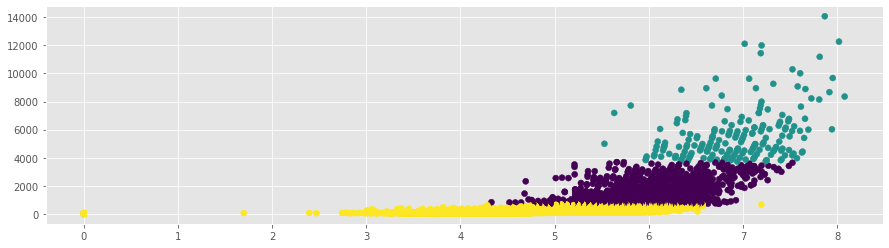

In [82]:

from sklearn.cluster import AgglomerativeClustering
fig,axs = plt.subplots(figsize=(15,4))

X1= c1[['vote', 'vote_count']].values

agl_c = AgglomerativeClustering(n_clusters= 3)
clustersag = agl_c.fit_predict(X1)
axs.scatter(X1[:,0],X1[:,1], c = clustersag)

In [83]:
c1["Clus_ag1"] = clustersag
calificadas["Clus_ag1"] = clustersag

In [84]:
calificadas.head()

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,...,actname,directid,director,vote,target,Clus_km,Clus_db,Clus_ag,Clus_km1,Clus_ag1
314,25000000,278,51.645403,The Shawshank Redemption,8.5,8358,18,Drama,97,Castle Rock Entertainment,...,Tim Robbins,4027.0,Frank Darabont,8.080637,0,2,0,4,0,1
12525,185000000,155,123.167259,The Dark Knight,8.3,12269,18,Drama,429,DC Comics,...,Christian Bale,525.0,Christopher Nolan,8.020387,0,2,1,1,0,1
2854,63000000,550,63.869599,Fight Club,8.3,9678,18,Drama,306,Twentieth Century Fox Film Corporation,...,Edward Norton,7467.0,David Fincher,7.954007,0,2,2,4,0,1
837,6000000,238,41.109264,The Godfather,8.5,6024,18,Drama,4,Paramount Pictures,...,Marlon Brando,1776.0,Francis Ford Coppola,7.945817,0,2,3,4,0,1
292,8000000,680,140.950236,Pulp Fiction,8.3,8670,53,Thriller,14,Miramax Films,...,John Travolta,138.0,Quentin Tarantino,7.918800,0,1,4,1,0,1


In [85]:
cluskm1 = c1['Clus_km1'].value_counts().reset_index()
cluskm1.columns = ['Clus_km1', 'numero']
cluskm1.head(11)

,Clus_km1,numero
0,1,18452
1,2,1017
2,0,204


In [86]:
clusag1 = c1['Clus_ag1'].value_counts().reset_index()
clusag1.columns = ['Clus_ag1', 'numero']
clusag1.head(11)

,Clus_ag1,numero
0,2,18069
1,0,1400
2,1,204


In [87]:
pop_gen = calificadas['genero'].value_counts().reset_index()
pop_gen.columns = ['genero', 'peliculas']
pop_gen.head(50)

,genero,peliculas
0,Drama,4653
1,Comedy,3939
2,Action,2182
3,Horror,1309
4,Documentary,1021
5,Thriller,890
6,Adventure,857
7,NA,804
8,Crime,799
9,Animation,668


In [88]:
pop_act = calificadas['actname'].value_counts().reset_index()
pop_act.columns = ['actname', 'No peliculas']
pop_act.head(20)

,actname,No peliculas
0,NA,649
1,Nicolas Cage,53
2,Robert De Niro,46
3,Jackie Chan,44
4,Bruce Willis,42
5,Tom Hanks,38
6,Clint Eastwood,37
7,Johnny Depp,37
8,Sylvester Stallone,35
9,John Travolta,33


In [89]:
pop_direct = calificadas['director'].value_counts().reset_index()
pop_direct.columns = ['director', 'No_peliculas']
pop_direct.head(20)

,director,No_peliculas
0,Woody Allen,46
1,Georges MÃ©liÃ¨s,43
2,Steven Spielberg,32
3,Clint Eastwood,32
4,Alfred Hitchcock,31
5,Werner Herzog,30
6,Dino Risi,28
7,Umberto Lenzi,27
8,Martin Scorsese,25
9,Lucio Fulci,24


In [90]:

pop_comp = calificadas['compname'].value_counts().reset_index()
pop_comp.columns = ['compania', 'No_peliculas']
pop_comp.head(20)


,compania,No_peliculas
0,0,3830
1,Paramount Pictures,522
2,Universal Pictures,475
3,Twentieth Century Fox Film Corporation,350
4,Warner Bros.,285
5,Columbia Pictures,273
6,Walt Disney Pictures,220
7,Metro-Goldwyn-Mayer (MGM),216
8,New Line Cinema,195
9,Columbia Pictures Corporation,141


In [91]:
moviedef['popularity'] = pd.to_numeric(moviedef['popularity'], errors='coerce')
moviedef[['title', 'popularity','vote_average','vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,popularity,vote_average,vote_count
15545,Inception,29.108149,8.1,14075
12525,The Dark Knight,123.167259,8.3,12269
14617,Avatar,185.070892,7.2,12114
17890,The Avengers,89.887648,7.4,12000
26648,Deadpool,187.860492,7.4,11444
22949,Interstellar,32.213481,8.1,11187
20127,Django Unchained,19.785025,7.8,10297
23821,Guardians of the Galaxy,53.291601,7.9,10014
2854,Fight Club,63.869599,8.3,9678
18316,The Hunger Games,20.031667,6.9,9634


KMeans
NMI: 11.81
ARI: 9.06
silhouette: 68.57
Homobeneity: 33.44
AgglomerativeClustering
NMI: 11.96
ARI: 8.18
silhouette: 66.03
Homobeneity: 34.67
DBSCAN
NMI: 2.05
ARI: 2.49
silhouette: 95.40
Homobeneity: 1.06


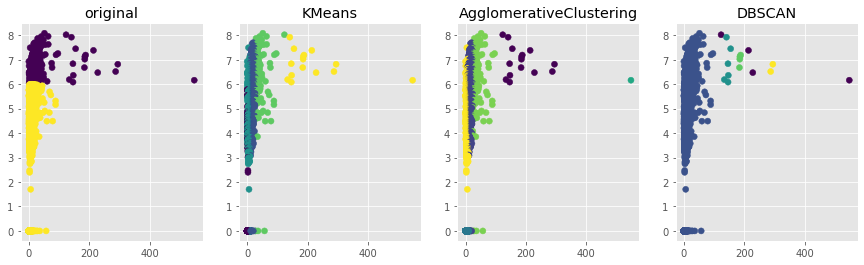

In [ ]:

import random
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, homogeneity_score
X= c1[['popularity', 'vote']].values
y = c1['target'].values
fig,axs = plt.subplots(1,4, figsize=(15,4))
axs[0].scatter(X[:,0], X[:,1], c=y)
axs[0].set_title('original')
N_class = 5
cluster_methodos = [KMeans(n_clusters=N_class,max_iter=500,init='random'),
                    AgglomerativeClustering(n_clusters=6),
                    DBSCAN(eps=10,min_samples=2)]

nom = ['KMeans', 'AgglomerativeClustering','DBSCAN']
for f, c_m,n in zip(range(3),cluster_methodos,nom):
  cluster=c_m.fit_predict(X)
  axs[f+1].scatter(X[:,0], X[:,1], c=cluster)
  axs[f+1].set_title(format(n))
  print(c_m.__class__.__name__)
  print("NMI: "+"{:.2f}".format(normalized_mutual_info_score(y,cluster)*100))
  print("ARI: "+"{:.2f}".format(adjusted_rand_score(y,cluster)*100))
  print("silhouette: "+"{:.2f}".format(silhouette_score(X,cluster)*100))
  print("Homobeneity: "+"{:.2f}".format(homogeneity_score(y,cluster)*100))

In [92]:
c2=calificadas
c2.head()

,budget,id,popularity,title,vote_average,vote_count,genid,genero,compid,compname,...,actname,directid,director,vote,target,Clus_km,Clus_db,Clus_ag,Clus_km1,Clus_ag1
314,25000000,278,51.645403,The Shawshank Redemption,8.5,8358,18,Drama,97,Castle Rock Entertainment,...,Tim Robbins,4027.0,Frank Darabont,8.080637,0,2,0,4,0,1
12525,185000000,155,123.167259,The Dark Knight,8.3,12269,18,Drama,429,DC Comics,...,Christian Bale,525.0,Christopher Nolan,8.020387,0,2,1,1,0,1
2854,63000000,550,63.869599,Fight Club,8.3,9678,18,Drama,306,Twentieth Century Fox Film Corporation,...,Edward Norton,7467.0,David Fincher,7.954007,0,2,2,4,0,1
837,6000000,238,41.109264,The Godfather,8.5,6024,18,Drama,4,Paramount Pictures,...,Marlon Brando,1776.0,Francis Ford Coppola,7.945817,0,2,3,4,0,1
292,8000000,680,140.950236,Pulp Fiction,8.3,8670,53,Thriller,14,Miramax Films,...,John Travolta,138.0,Quentin Tarantino,7.918800,0,1,4,1,0,1


In [97]:
def recomendar(genre):
  qualified = c2[(c2['genero'] == genre ) & (c2['Clus_km']==0)][['title', 'vote','vote_count', 'popularity', 'compname', 'director']]
  qualified.head(100)
  return qualified



In [98]:
recomendar('Romance')

,title,vote,vote_count,popularity,compname,director
1340,Grease,6.357695,1633,7.854899,Paramount Pictures,Randal Kleiser
21817,Blue Is the Warmest Color,6.171671,1114,4.938148,Eurimages,Abdellatif Kechiche
29944,Carol,6.171035,1014,8.364201,Killer Films,Todd Haynes
10135,Cinderella Man,6.139715,630,6.363884,Miramax Films,Ron Howard
19024,Three Steps Above Heaven,6.092872,513,6.285970,Antena 3 Films,Fernando GonzÃ¡lez Molina
...,...,...,...,...,...,...
27368,Station West,0.000000,7,9.775598,RKO Radio Pictures,Sidney Lanfield
29173,Christmas at Cartwright's,0.000000,10,7.295144,0,Graeme Campbell
42675,Everybody Loves Somebody,0.000000,22,7.077991,Videocine S.A. de C.V.,Catalina Aguilar Mastretta
41228,Whitney,0.000000,32,8.048503,Silver Screen Pictures,Angela Bassett


In [122]:
def get_recommendations(title):
  df = c2[c2['title'] == title]
  qualified = c2[#(c2['genid'] == df['genid'].values[0] ) & 
                 (c2['Clus_km']==2)& (c2['actid'] == df['actid'].values[0] )][['title','genero','actname', 'vote','vote_count', 'popularity', 'compname', 'director']]
  
  return qualified
 
  

In [123]:
get_recommendations('Fast & Furious 6')

,title,genero,actname,vote,vote_count,popularity,compname,director
28913,Furious 7,Action,Vin Diesel,6.837225,4253,27.275687,Universal Pictures,James Wan
43327,The Fate of the Furious,Action,Vin Diesel,6.418541,3803,48.573287,Universal Pictures,F. Gary Gray
